In [ ]:
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Data.csv', index_col = 0)

X = data.drop(['Y'],axis = 1)
X.reset_index(inplace=True)

Y = data['Y']
Y.reset_index(drop=True, inplace=True)

Y = Y.values
Y = Y.reshape((-1, 1))

X = X.values
X_norm = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

In [ ]:
indices = np.arange(X.shape[0])
random.shuffle(indices)

In [ ]:
def split_data(X,Y,Xo,indices,test_size = 0.2,random_state = 0):
  np.random.seed(random_state)
  test_size = int(test_size * len(X))

  train_indices = indices[test_size:]
  test_indices = indices[:test_size]
  X_train = [X[i] for i in train_indices]
  Y_train = [Y[i] for i in train_indices]
  X_test = [X[i] for i in test_indices]
  Y_test = [Y[i] for i in test_indices]
  Xo_train = [Xo[i] for i in train_indices]
  Xo_test = [Xo[i] for i in test_indices]

  return np.asarray(X_train), np.asarray(X_test), np.asarray(Y_train), np.asarray(Y_test),np.asarray(Xo_train),np.asarray(Xo_test)

In [ ]:
def poly_trans(x,y,deg):
    for i in range(0,deg+1):
          y = np.column_stack([y,(x[:,0]**i)])
    return y

In [ ]:
def bgd_reg(X_train, Y_train, X_test, Y_test,learning_rate = 0.01, n_epochs = 500):

  training_error = []
  testing_error = []
  weights = np.random.randn(1,X_train.shape[1])
  epoch = 1
  grad = weights

  for i in range(n_epochs):

    Y_pred_train = np.dot(X_train,weights.T)
    errors_train = Y_pred_train - Y_train
    grad =  X_train.T.dot(errors_train) / (2*len(Y))
    weights = weights - learning_rate * grad.T
    training_error.append(np.mean(np.square(errors_train)))

    Y_pred_test = np.dot(X_test,weights.T)
    errors_test = Y_pred_test - Y_test
    testing_error.append(np.mean(np.square(errors_test)))

    epoch += 1

  return weights,training_error,testing_error

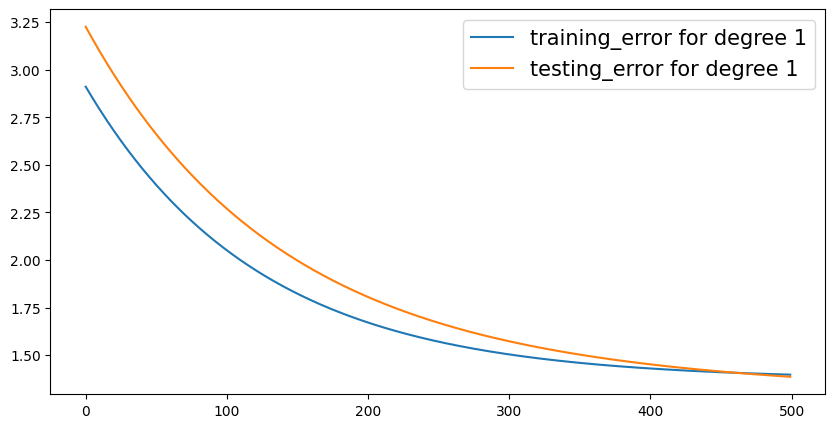

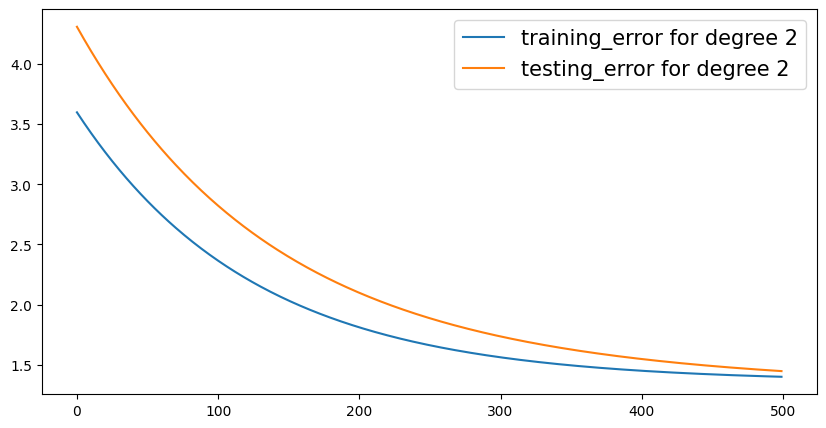

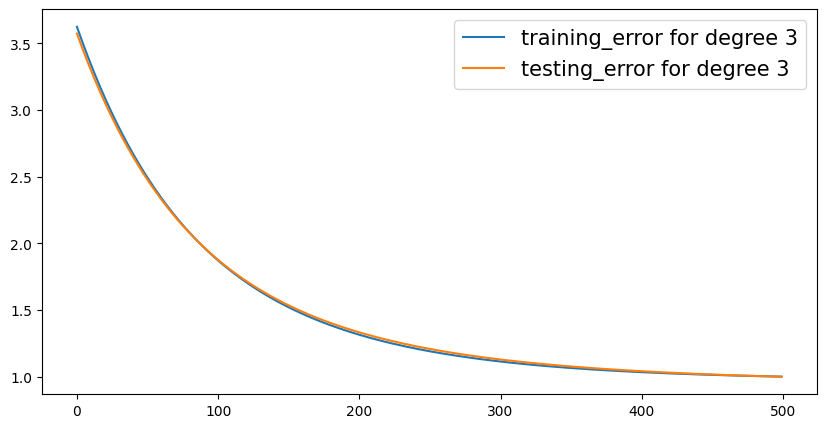

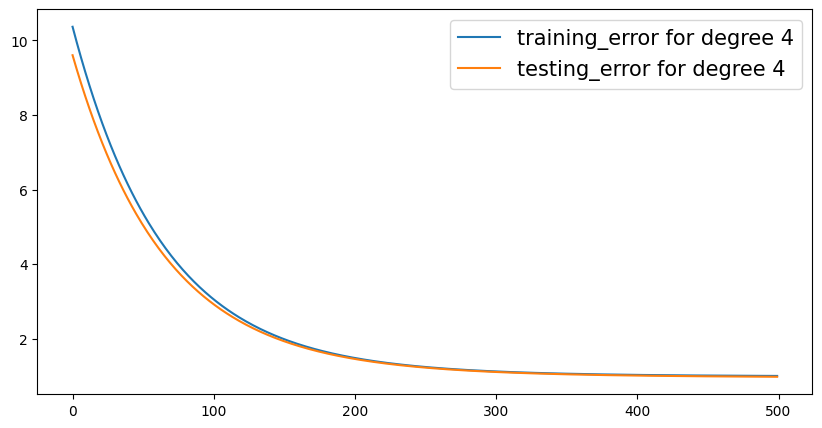

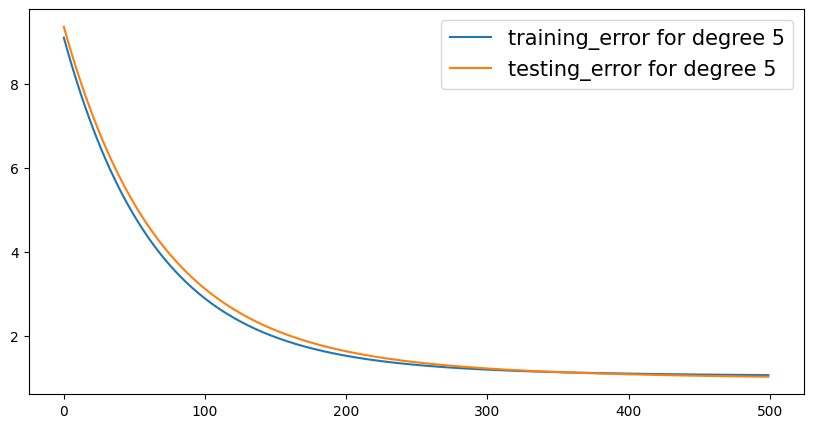

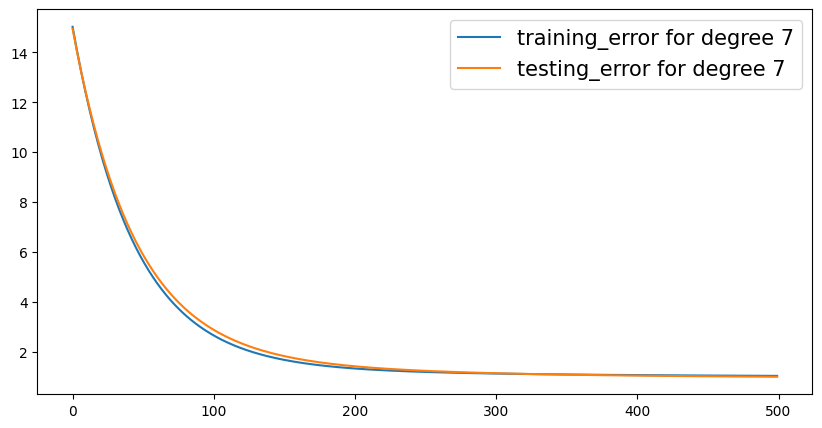

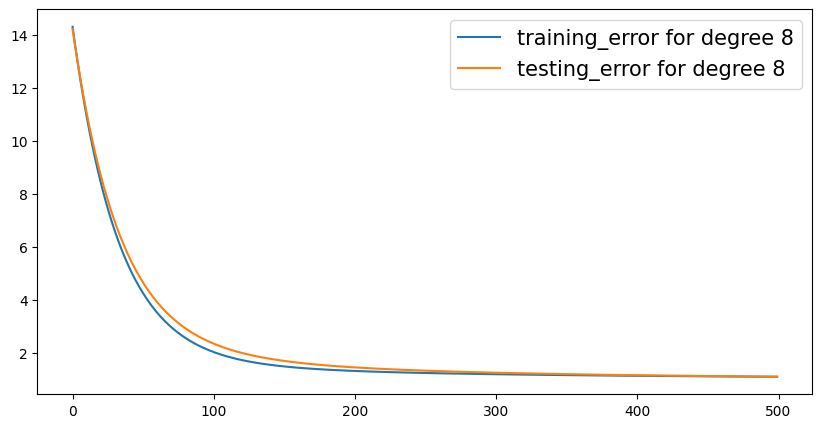

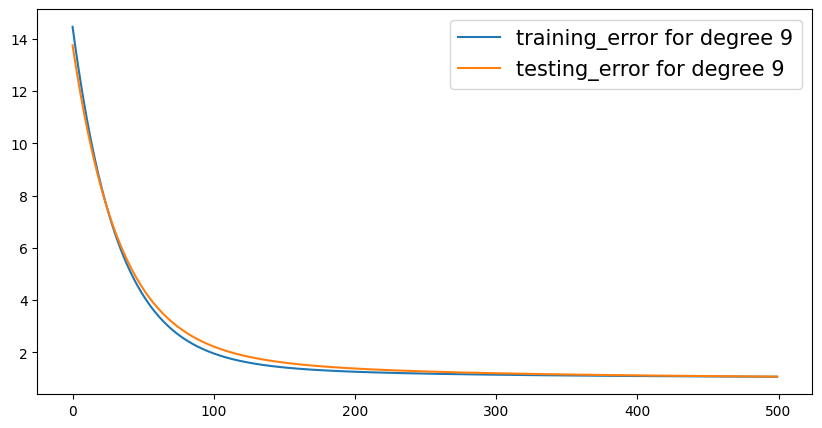

In [ ]:
f_test_error = []
f_train_error = []
for j in range(1,10):

  dum = np.zeros((X.shape[0],1))
  X_transformed = poly_trans(X_norm,dum,j)
  X_transformed = X_transformed[:,1:]

  X_transformed = np.delete(X_transformed,0,axis = 1)
  X_transformed = (X_transformed-np.mean(X_transformed,axis = 0))/np.std(X_transformed,axis = 0)
  X_transformed = np.insert(X_transformed,0,1,axis = 1)

  X_train, X_test, Y_train, Y_test,Xo_train,Xo_test = split_data(X_transformed, Y,X_norm,indices, test_size = 0.2, random_state = 0)

  weights,training_error,testing_error = bgd_reg(X_train, Y_train ,X_test, Y_test)
  f_test_error.append([j,testing_error[len(testing_error)-1]])
  f_train_error.append([j,training_error[len(training_error)-1]])
  pred_y = np.dot(X_test,weights.T)

  fram =[]
  for i in range(len(Xo_test)):
    fram.append([float(Xo_test[i]),float(pred_y[i])])
  fram = np.array(fram)
  fram = fram[np.argsort(fram[:,0])]

  if j==3:
    plt.figure(figsize=(10,5))
    plt.title(f'Best fit polynomial curve for degree: {j}')
    plt.plot(Xo_test,Y_test,'o')
    plt.plot(fram[:,0],fram[:,1])
    plt.show()

  plt.figure(figsize=(10,5))
  plt.plot(training_error, label= f'training_error for degree {j}')
  plt.plot(testing_error, label= f'testing_error for degree {j}')
  plt.legend(prop={'size': 15})
  plt.show()


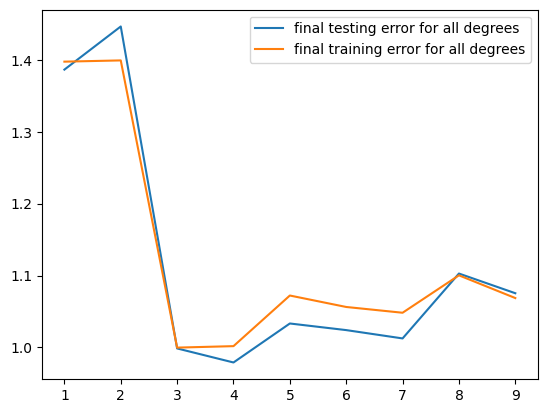

In [ ]:
f_test_error = np.array(f_test_error)
plt.plot(f_test_error[:,0],f_test_error[:,1],label = 'final testing error for all degrees')
plt.legend(prop={'size':10})

f_train_error = np.array(f_train_error)
plt.plot(f_train_error[:,0],f_train_error[:,1],label = 'final training error for all degrees')
plt.legend(prop={'size':10})
plt.show()